# Testing for the subtractor class
## Module import test

In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt 

from astrosceni.image import Image
from astrosceni.subtractor import Subtractor

/home/joshua_ong/SCENI/astrosceni/subtractor.py:212: SyntaxWarning: invalid escape sequence '\m'
  plt.xlabel('$^\mu$')
/home/joshua_ong/SCENI/astrosceni/subtractor.py:213: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel('s($^\mu$)')


## Converting calcOptimalScaleFactor to work with numpy 

In [2]:

factors = np.linspace(0, 2, 200)

arr1 = np.array([[12, 7], [4, 2]])

#arr1 = np.array([[12, 4, 5, 8], [7, 2, 54, 3]])
#arr2 =  np.array([[7, 2, 54, 3], [20, 16, 11, 8]])

print(arr1, '\n')
#print(arr2, '\n')


print("Expect: 0.6385778469314267 \n\nGot:")

print((1/(arr1.size - 1)*(np.power((arr1 - arr1.flatten().mean())/arr1.flatten().std(), 3)).flatten().sum()))


[[12  7]
 [ 4  2]] 

Expect: 0.6385778469314267 

Got:
0.6385778469314267


In [3]:
Ha_img = Image()
Ha_img.load("../data/rim_Ha_wcs.fits")
#NB_arr = np.array(NB.getImageData())

R_img = Image()
R_img.load("../data/rim_R_wcs.fits")
#BB_arr = np.array(BB.getImageData())

# Instantiation, setScaleFactorRange and calcOptimalScaleFactor test

In [4]:
sub_obj = Subtractor(Ha_img, R_img)

sub_obj.setScaleFactorRange()

optimal_factor = sub_obj.calcOptimalScaleFactor()

print(optimal_factor)


1.407035175879397


## plotPixelDistribution test

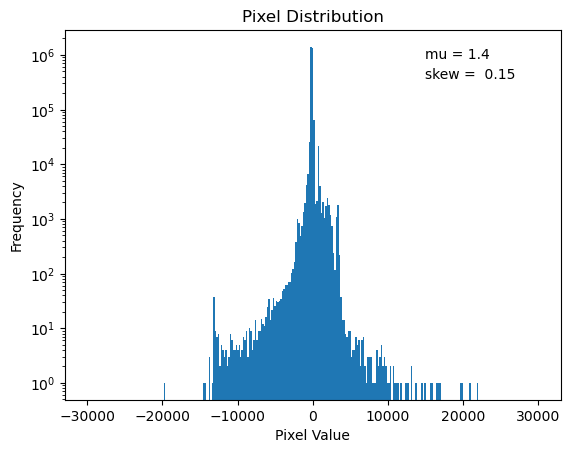

In [5]:
sub_obj.plotPixelDistribution(1.4, lower_lim = -30000, upper_lim = 30000)

## plotSkewVsMu test

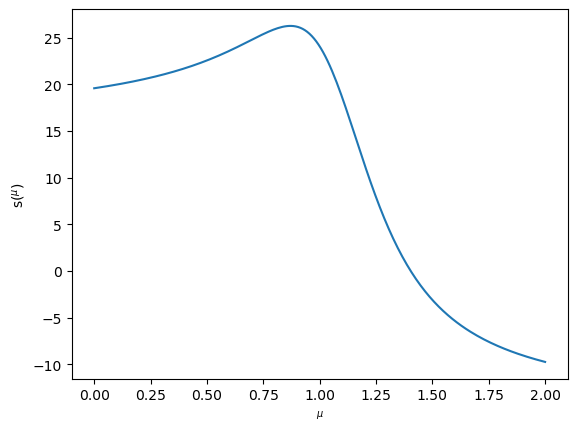

In [6]:
sub_obj.plotSkewVsMu()

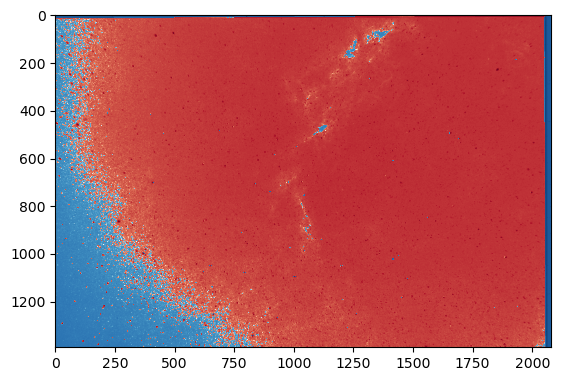

In [12]:
from matplotlib.colors import LogNorm, SymLogNorm

plt.imshow(sub_obj.getSubtractedImage(sub_obj.NB_arr, sub_obj.BB_arr, 1.4), cmap='RdBu', norm=SymLogNorm(vmin=-1e4, vmax=1e4, linthresh=0.03))